- __Pregnancies__ : Number of times pregnant
- __Glucose__ : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- __Blood Pressure__ : Diastolic blood pressure (mm Hg)
- __SkinThickness__ : Triceps skin fold thickness (mm)
- __Insulin__ : 2-Hour serum insulin (mu U/ml)
- __DiabetsPedigreeFunction__ : A function that calculates the probability of having diabetes according to one's descendants
- __BMI__ : Body mass index (weight in kg/(height in m)^2)
- __Age__ : Age (years)
- __Outcome__ : Class variable (0 or 1)

## Import and load dataset

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_diabetes = pd.read_csv("diabetes.csv")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Dataset Info

In [19]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df_diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Check for missing value

In [ ]:
df_diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Check statistic value

In [ ]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Check for column with zero values

In [ ]:
zero_count = df_diabetes[df_diabetes.columns[df_diabetes.eq(0).any()]].eq(0).sum()

print(zero_count)
print(df_diabetes.shape[0])

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64
768


## Fill zero value

In [20]:
#kolom Glucose, BloodPressure, SkinThickness, Insulin, BMI tidak logis jika ada nilai 0

df_copy = df_diabetes.copy()

# drop Glucose with value = 0
df_copy=df_copy[df_copy.Glucose != 0]

# fill zero value with median
df_copy["BloodPressure"]=df_copy["BloodPressure"].replace(0, df_copy["BloodPressure"].median())
df_copy["SkinThickness"]=df_copy["SkinThickness"].replace(0, df_copy["SkinThickness"].median())
df_copy["BMI"]=df_copy["BMI"].replace(0, df_copy["BMI"].median())

In [ ]:
zero_count = df_copy[df_copy.columns[df_copy.eq(0).any()]].eq(0).sum()

print(zero_count)
print(df_copy.shape[0])

Pregnancies    111
Insulin        370
Outcome        497
dtype: int64
763


In [21]:
#value 0 pada "Insulin" sekitar 50 % total row dgn std yang tinggi, jadi lebih baik di drop

df_copy.drop(columns="Insulin", inplace=True)

In [22]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,23,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,23,30.1,0.349,47,1


## Feature Manipulation

<function matplotlib.pyplot.show(close=None, block=None)>

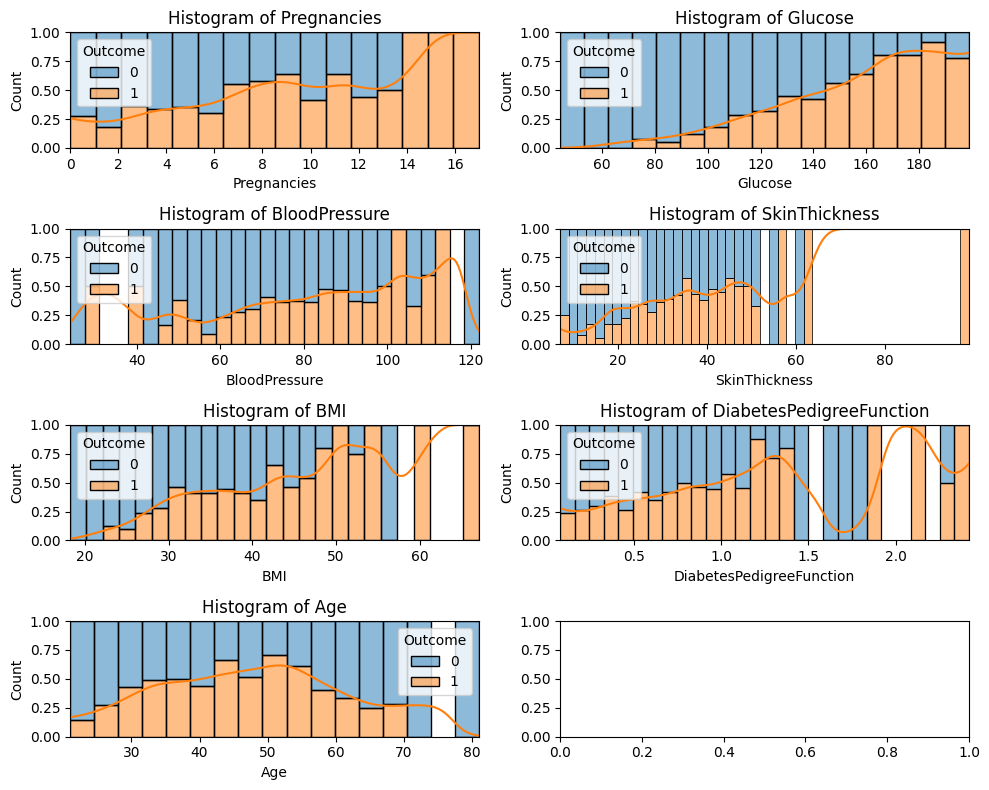

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over the subplots and plot histplot
for i, column in enumerate(["Pregnancies","Glucose","BloodPressure","SkinThickness", "BMI","DiabetesPedigreeFunction", "Age"]):
    sns.histplot(data=df_copy, x=column, hue="Outcome",multiple='fill', kde=True, ax=axes[i])

    axes[i].set_title(f"Histogram of {column}")

plt.tight_layout()
plt.show

#sns.histplot(data=df_copy, x="Pregnancies", hue="Outcome",multiple='fill', kde=True,shrink=0.9)
#sns.histplot(data=df_copy, x="Glucose", hue="Outcome",multiple='fill', kde=True,shrink=0.9)
#sns.histplot(data=df_copy, x="BloodPressure", hue="Outcome",multiple='fill', kde=True,shrink=0.9)
#sns.histplot(data=df_copy, x="BMI", hue="Outcome",multiple='fill', kde=True,shrink=0.9)
#sns.histplot(data=df_copy, x="DiabetesPedigreeFunction", hue="Outcome",multiple='fill', kde=True,shrink=0.9)


## Check for class imbalance

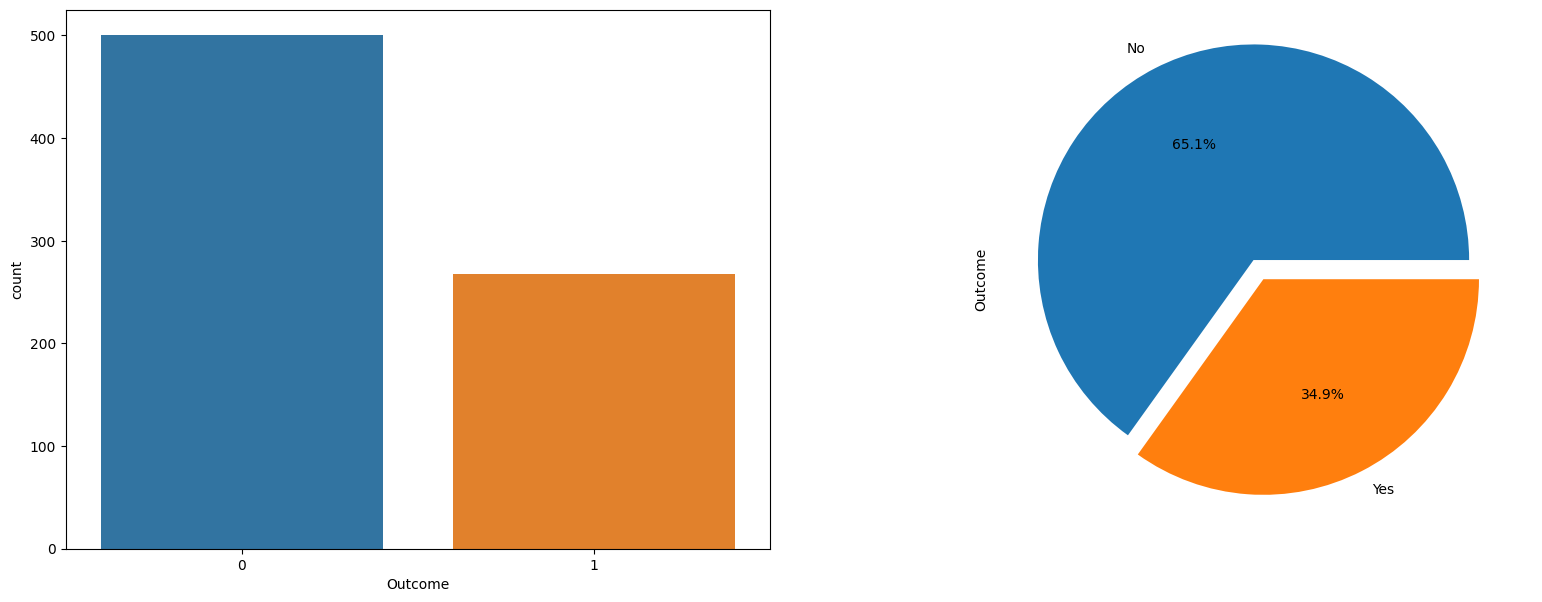

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

sns.countplot(x=df_diabetes["Outcome"], ax=ax[0])
df_diabetes["Outcome"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%",labels=["No", "Yes"], ax=ax[1])

plt.show()

## Handling Imbalanced Class

In [23]:
df_diabetes = df_copy

In [24]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [25]:
y_resampled.value_counts()

0    266
1    266
Name: Outcome, dtype: int64

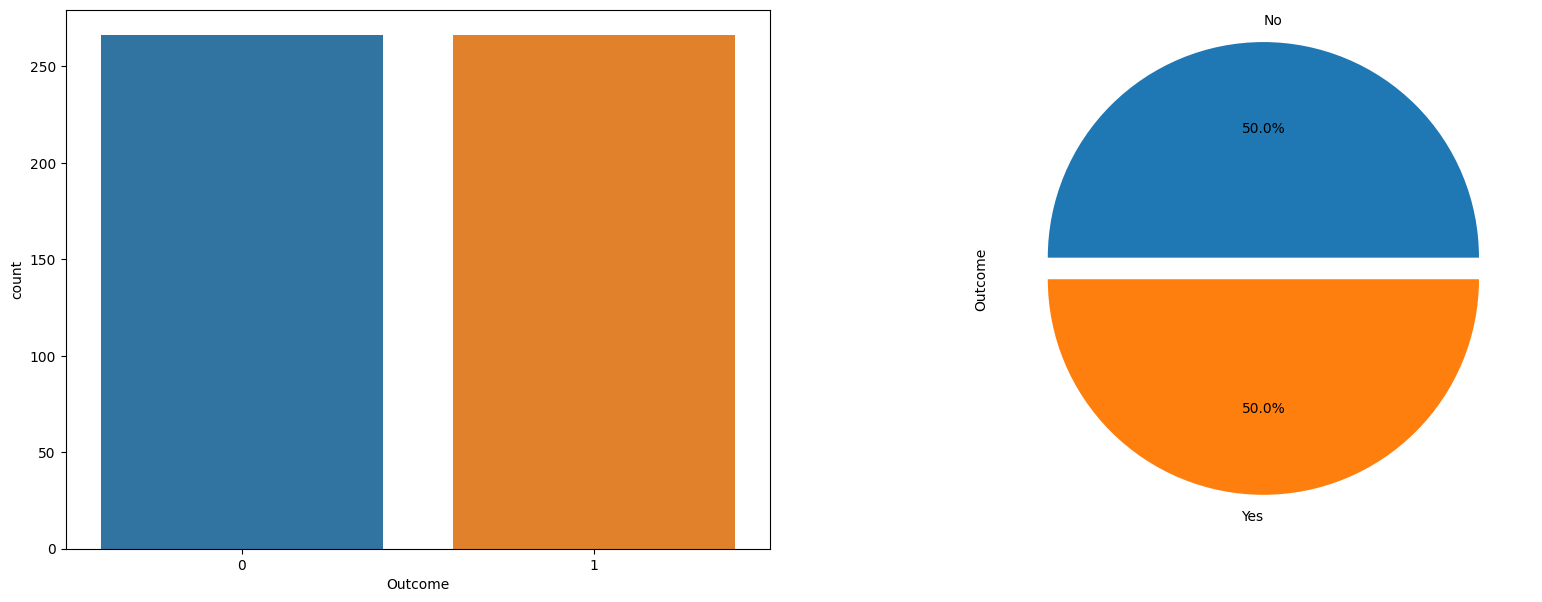

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

sns.countplot(x=y_resampled, ax=ax[0])
y_resampled.value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%",labels=["No", "Yes"], ax=ax[1])

plt.show()

## Split Data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

## Scaling Data

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Define Model

In [28]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense

In [29]:
model = Sequential()

In [30]:
model.add(Dense(units=8, input_dim=7, activation='relu')) #input layer + 1 hidden layer
model.add(Dense(units=4, activation='relu')) #2nd hidden layer

model.add(Dense(units=1, activation='sigmoid')) #output layer

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 64        
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


## Compile Model

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train Model

In [33]:
model.fit(X_train, y_train, epochs=500, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/500
5/5 [==============================] - 1s 55ms/step - loss: 0.8522 - accuracy: 0.5271 - val_loss: 0.8361 - val_accuracy: 0.5888
Epoch 2/500
5/5 [==============================] - 0s 14ms/step - loss: 0.8336 - accuracy: 0.5388 - val_loss: 0.8192 - val_accuracy: 0.5981
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 0.8161 - accuracy: 0.5412 - val_loss: 0.8038 - val_accuracy: 0.5794
Epoch 4/500
5/5 [==============================] - 0s 15ms/step - loss: 0.8008 - accuracy: 0.5459 - val_loss: 0.7888 - val_accuracy: 0.5888
Epoch 5/500
5/5 [==============================] - 0s 11ms/step - loss: 0.7851 - accuracy: 0.5553 - val_loss: 0.7749 - val_accuracy: 0.5794
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7710 - accuracy: 0.5765 - val_loss: 0.7616 - val_accuracy: 0.5701
Epoch 7/500
5/5 [==============================] - 0s 13ms/step - loss: 0.7580 - accuracy: 0.5765 - val_loss: 0.7495 - val_accuracy: 0.5607
Epoch 8/500
5/5 [===

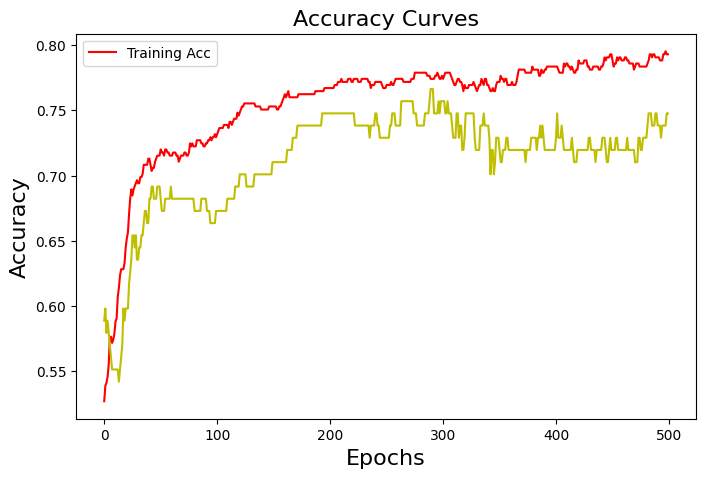

In [34]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.plot(model.history.history['val_accuracy'], 'y')
plt.legend(['Training Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

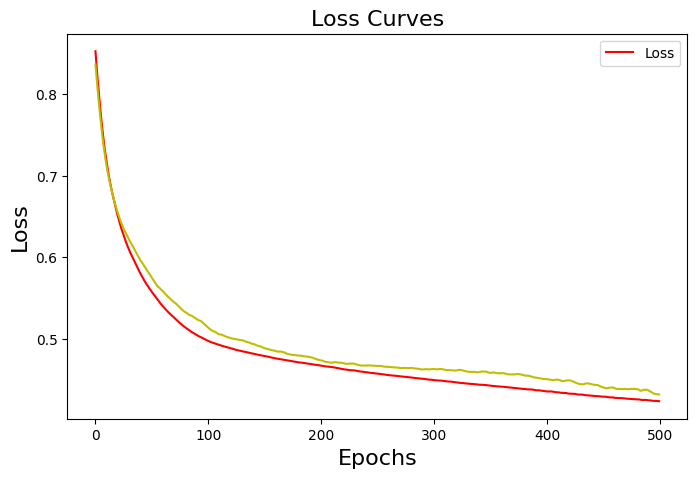

In [35]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['loss'], 'r')
plt.plot(model.history.history['val_loss'], 'y')
plt.legend(['Loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

In [36]:
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 74.77


In [37]:
import sklearn.metrics as met

y_predict = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [38]:
import sklearn.metrics as met
confmat_dt = met.confusion_matrix(y_test, np.round(y_predict))
confmat_dt

array([[29, 19],
       [ 8, 51]])

In [39]:
print(met.classification_report(y_test, np.round(y_predict)))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68        48
           1       0.73      0.86      0.79        59

    accuracy                           0.75       107
   macro avg       0.76      0.73      0.74       107
weighted avg       0.75      0.75      0.74       107

